# Machine Learning Project

In this project, I have a dataset of a bank, where customers are leaving little by little. The bankers figured out that its cheaper to save the existing customers than attract new ones. This machine learning model will predict where a customer will leave the bank soon depending on past behavior and termination of contracts

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.utils import shuffle, resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

### Download and Prepare Data

In [10]:
data = pd.read_csv('/datasets/Churn.csv')

#### Rename and Lowercase Column Names

In [11]:
data.columns = data.columns.str.lower()

In [12]:
data = data.rename(
columns = {'rownumber': 'row_number', 
          'customerid': 'customer_id', 
          'creditscore':'credit_score', 
          'numofproducts':'num_of_products',
          'hascrcard':'has_cr_card',
          'isactivemember':'is_active_member',
          'estimatedsalary':'estimated_salary'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Dropping Columns That Wont affect the DataFrame

Below, I dropped the columns: row_number, customer_id, surname, and geography because those columns wont affect the model predictions that we are going to create.

In [14]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [15]:
data

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Filling in Missing Values

In [16]:
data.isna().sum()

credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

As we can see, the tenure column has 909 missing values. Were going to fill those missing values with the median value, which in this case is 5.0

In [17]:
data['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [18]:
data_median = data['tenure'].median()
data_median

5.0

In [19]:
data['tenure'] = data['tenure'].fillna(data_median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### Converting The Object DataTypes to Int DataTypes Using Get_dummies()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [21]:
data1 = pd.get_dummies(data, columns=['geography', "gender"])

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_France   10000 non-null  uint8  
 10  geography_Germany  10000 non-null  uint8  
 11  geography_Spain    10000 non-null  uint8  
 12  gender_Female      10000 non-null  uint8  
 13  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 752.1 KB


### Imbalance of Classes

In [23]:
data1['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

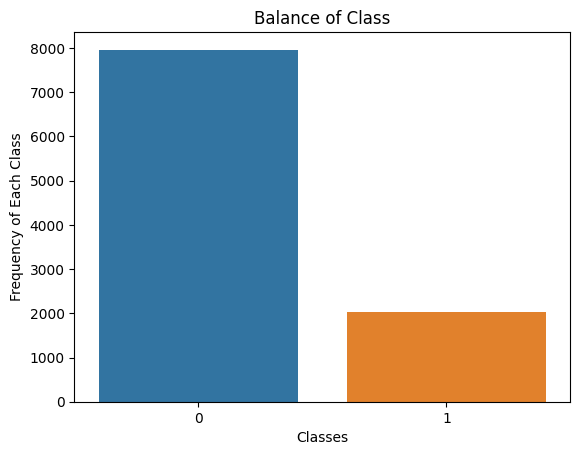

In [24]:
count_plot = sns.countplot(data1['exited'])
count_plot.set_title('Balance of Class')
count_plot.set_ylabel("Frequency of Each Class")
count_plot.set_xlabel("Classes")

plt.show()

As you can see, there is an imbalance of class, The Class 0 makes up 80% of the data, while the 1 class makes 20% of the data.

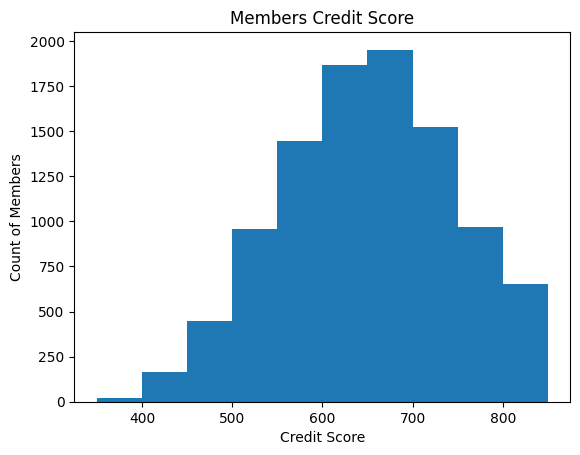

In [25]:

plt.hist(data1['credit_score'])
plt.title("Members Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count of Members")
plt.show()

Looking at the data column of Credit scores, you can see that this is a normal distribution because it has a symmetrical bell shaped curve.

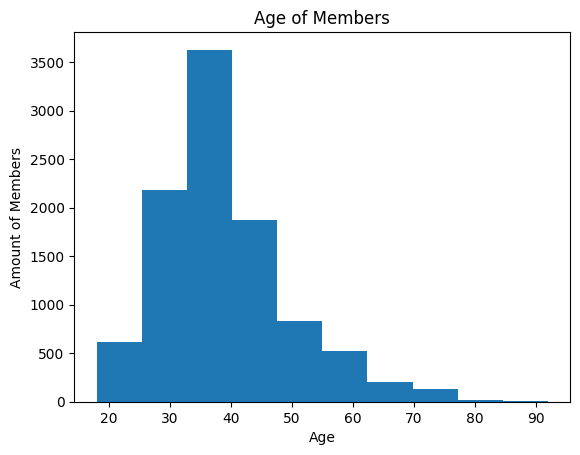

In [26]:
plt.hist(data1['age'])
plt.title('Age of Members')
plt.ylabel("Amount of Members")
plt.xlabel("Age")
plt.show()

The age column, by plotting it in a graph, you can see that the data in that column is skewed to the right, as you can see that most of the age group in the 30-50 age group.

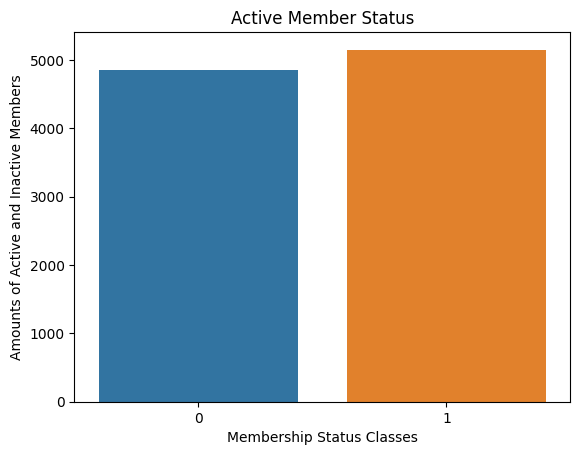

In [27]:
active_member = sns.countplot(data['is_active_member'])
active_member.set_title("Active Member Status")
active_member.set_ylabel('Amounts of Active and Inactive Members')
active_member.set_xlabel("Membership Status Classes")
plt.show()

By looking at the countplot, if you take into consideration the is_active column that specifies if a member is active or not, this dataset is well balanced.

### Training the Model

In this step of the project, were going to train a model using the dataset even though the classes are imbalanced. Since, were looking to predict a categorical value, were going to use the Logistic Regression Model.

#### Logistic Regression with Imbalanced Data

In [28]:
features = data1.drop(['exited'], axis=1)
target = data1['exited']

X_train, X_test_val, y_train, y_test_val = train_test_split(features, target, test_size=0.4, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 13)
(6000,)
(2000, 13)
(2000,)


In [29]:
model = LogisticRegression(random_state=10, solver='liblinear', max_iter=700)
model.fit(X_train, y_train)
prediction = model.predict(X_val)
f1 = f1_score(y_val, prediction)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.13


Using the Imbalanced Data and after specifying a max_iter of 700,  we got an F1 Score of 0.13 using the Logistic Regression model.

#### Logistic Regression with the class_weight='balanced' parameter

In [30]:
model = LogisticRegression(random_state=10, class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
prediction = model.predict(X_val)
f1_balanced = f1_score(y_val, prediction)
print(f"F1 Score: {f1_balanced:.2f}")

F1 Score: 0.45


In [31]:
print(f"""After comparing the two models, one with balanced weights and one without,
the model with balanced weights f1 score is {f1_balanced:.2f}, and the other is {f1:.2f}. Improving but
still not enough to reach the min value.""")

After comparing the two models, one with balanced weights and one without,
the model with balanced weights f1 score is 0.45, and the other is 0.13. Improving but
still not enough to reach the min value.


#### Decision Tree Model with imbalanced Data.

In [32]:
model_DT = DecisionTreeClassifier(random_state=10, max_depth=7)
model_DT.fit(X_train, y_train)
prediction_dt = model_DT.predict(X_val)
f1_Dt = f1_score(y_val,prediction_dt)
print(f"F1 Score for Decision Tree Model: {f1_Dt:.2f}")

F1 Score for Decision Tree Model: 0.55


#### Decision Tree with balanced weights classes

In [33]:
model_DT = DecisionTreeClassifier(random_state=10, class_weight='balanced', max_depth=4)
model_DT.fit(X_train, y_train)
prediction_dt = model_DT.predict(X_val)
f1_balanced = f1_score(y_val,prediction_dt)
print(f"F1 Score for Decision Tree Model: {f1_balanced:.2f}")

F1 Score for Decision Tree Model: 0.54


In [34]:
print(f"""
The Decision Tree model turned out to be a better option than the Logistic Regression, but still wasnt enought to 
reach the minimum value. The first model with imbalanced weights is {f1_Dt:.2f} and the model with balanced weight classes
is {f1_balanced:.2f}. It went down by one decimal after balancing the weights, but still not good enough.
""")


The Decision Tree model turned out to be a better option than the Logistic Regression, but still wasnt enought to 
reach the minimum value. The first model with imbalanced weights is 0.55 and the model with balanced weight classes
is 0.54. It went down by one decimal after balancing the weights, but still not good enough.



#### Random Forest with Imbalanced Data

In [35]:
best_score = 0
best_n_estimators = 0

for n_estimators in range(1, 50):
    model_forest = RandomForestClassifier(max_depth= 10, random_state=10, n_estimators=n_estimators)
    model_forest.fit(X_train, y_train)
    forest_prediction = model_forest.predict(X_val)
    f1_score_val = f1_score(y_val, forest_prediction)

    if f1_score_val > best_score:
        best_score = f1_score_val
        best_n_estimators = n_estimators

print(f"Best F1 Score using RandomForestClassifier: {best_score:.2f} with n_estimators: {best_n_estimators}")

Best F1 Score using RandomForestClassifier: 0.56 with n_estimators: 7


#### Random Forest Classifier with balanced weights

In [52]:
best_score_balanced = 0
best_n_estimators_balanced = 0

for n_estimators in range(1, 50):
    model_forest = RandomForestClassifier(max_depth= 10, random_state=10, n_estimators=n_estimators, class_weight='balanced')
    model_forest.fit(X_train, y_train)
    forest_prediction = model_forest.predict(X_val)
    f1_score_val_balanced = f1_score(y_val, forest_prediction)

    if f1_score_val_balanced > best_score_balanced:
        best_score_balanced = f1_score_val_balanced
        best_n_estimators_balanced = n_estimators

print(f"Best F1 Score using RandomForestClassifier: {best_score_balanced:.2f} with n_estimators: {best_n_estimators_balanced}")

Best F1 Score using RandomForestClassifier: 0.61 with n_estimators: 26


In [40]:
print(f"""
After comparing the Random Forest Classifier Model, the model without the balanced weights returned a f1 score of {best_score:.2f} 
model with the balanced weight of classes and adjusting the max_depth by 10, we were able to get a f1 score of
{best_score_balanced:.2f}. Value that is acceptable for this project.
""")


After comparing the Random Forest Classifier Model, the model without the balanced weights returned a f1 score of 0.56 
model with the balanced weight of classes and adjusting the max_depth by 10, we were able to get a f1 score of
0.61. Value that is acceptable for this project.



## Comparing the models on resampled Data(Upsampling and Downsampling)

#### Upsampling

In [41]:
smote = SMOTE(random_state=10)
features_resampled, target_resampled = smote.fit_resample(X_train, y_train)

print(features_resampled.shape)
print(target_resampled.shape)

(9574, 13)
(9574,)


#### Downsampling

In [43]:

rus = RandomUnderSampler(random_state=10)

features_downsampled, target_downsampled = rus.fit_resample(X_train, y_train)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2426, 13)
(2426,)


#### Logistic Regression with up- and downsampled data

##### Upsampling Logistic Regression

In [44]:
model = LogisticRegression(random_state=10, solver='liblinear')
model.fit(features_resampled, target_resampled)
prediction_up = model.predict(X_val)
f1_balanced_up = f1_score(y_val, prediction_up)
print(f"F1 Score: {f1_balanced_up:.2f}")

F1 Score: 0.43


##### Downsampling Logistic Regression

In [45]:
model = LogisticRegression(random_state=10, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
prediction_down = model.predict(X_val)
f1_balanced_down = f1_score(y_val, prediction_down)
print(f"F1 Score: {f1_balanced_down:.2f}")

F1 Score: 0.42


#### Decision Tree with up- and downsampled data

##### Upsampling Decision Tree Classifier

In [46]:
model_DT = DecisionTreeClassifier(random_state=10, max_depth=7)
model_DT.fit(features_resampled, target_resampled)
prediction_dt_up = model_DT.predict(X_val)
f1_balanced_up_dt = f1_score(y_val,prediction_dt_up)
print(f"F1 Score for Decision Tree Model: {f1_balanced_up_dt:.2f}")

F1 Score for Decision Tree Model: 0.58


##### Downsampling Decision Tree Classifier

In [49]:
model_DT = DecisionTreeClassifier(random_state=10, max_depth=5)
model_DT.fit(features_downsampled, target_downsampled)
prediction_dt_down = model_DT.predict(X_val)
f1_balanced_down_dt = f1_score(y_val,prediction_dt_down)
print(f"F1 Score for Decision Tree Model: {f1_balanced_down_dt:.2f}")

F1 Score for Decision Tree Model: 0.54


#### Random Forest Classifier with up- and downsampled data

#### Upsampling Random Forest Classifier

In [48]:
best_score_up = 0
best_n_estimators_up = 0

for n_estimators in range(1, 50):
    model_forest = RandomForestClassifier(max_depth= 10, random_state=10, n_estimators=n_estimators)
    model_forest.fit(features_resampled, target_resampled)
    forest_prediction_up = model_forest.predict(X_val)
    f1_score_val_balanced_up = f1_score(y_val, forest_prediction_up)

    if f1_score_val_balanced_up > best_score_up:
        best_score_up = f1_score_val_balanced_up
        best_n_estimators_up = n_estimators

print(f"F1 Score: {best_score_up:.2f} with n_estimators: {best_n_estimators_up}")

F1 Score: 0.58 with n_estimators: 46


#### Downsampling Random Forest Classifier

In [51]:
best_score_down = 0
best_n_estimators_down = 0

for n_estimators in range(1, 50):
    model_forest = RandomForestClassifier(max_depth= 10, random_state=10, n_estimators=n_estimators)
    model_forest.fit(features_downsampled, target_downsampled)
    forest_prediction_down = model_forest.predict(X_val)
    f1_score_val_balanced_down = f1_score(y_val, forest_prediction_down)

    if f1_score_val_balanced_down > best_score_down:
        best_score_down = f1_score_val_balanced_down
        best_n_estimators_down = n_estimators

print(f"F1 Score: {best_score_down:.2f} with n_estimators: {best_n_estimators_down}")

F1 Score: 0.57 with n_estimators: 46


## Choosing the best Model Based on their F1 Score.

According to the models we created, and after upsampling, downsampling the data and balancing out the weights of the classes, 
the best model that we created is the Random Forest Classifier model, after upsampling the data with an f1 score of .61

## Testing Random Forest Classifier with Test Set

In [53]:
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

best_model = RandomForestClassifier(max_depth=10, random_state=10, n_estimators=26, class_weight='balanced')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

F1 Score: 0.60
AUC-ROC: 0.85


## Conclusion

After creating a Logistic Regression, a Decision Tree Classfier and a Random Forest Classifier for this project, the best model is the Random Forest Classifier for this dataset. First, we balanced the weights of the classes, and we gave it a max_depth of 10 to give us a higher F1 Score. After using that model on the test set, I was able to get a F1 Score of 0.60 with a AUC-ROC score of .85.